# 矩阵的奇异值分解（SVD）及其可视化

$A$ 是一个矩阵，可以表示一个线性变换。该变换可以分解为三个子变换，

1、旋转等正交变换，


2、缩放变换，


3、旋转等正交变换。

这三个步骤对应于三个矩阵 $U$、$S$ 和 $V$。

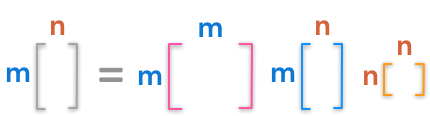

比如，

$$
\left[\begin{array}{ll}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{array}\right]=\left[\begin{array}{cc}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta
\end{array}\right]\left[\begin{array}{cc}
\sigma_{1} & \\
& \sigma_{2}
\end{array}\right]\left[\begin{array}{cc}
\cos \phi & \sin \phi \\
-\sin \phi & \cos \phi
\end{array}\right]
$$

可以将矩阵视为特定的线性变换。当将矩阵应用于向量时，将对其应用该线性变换。

## 一、只考虑缩放变换

我们先来看比较简单的情况，即不考虑正交变换，只有缩放变换的情况。

### 示例 1

我们将如下矩阵

$$
{\bf A}=\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix} 
$$

作用到如下向量上

$$
\bf{v}=\begin{bmatrix} x \\ y \end{bmatrix}
$$

得到

$$
\begin{aligned} \begin{bmatrix} x’ \\ y’ \end{bmatrix} &=\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} \\[0.8em] &= \begin{bmatrix} 2x + 0y \\ 0x + 2y \end{bmatrix} \\[0.8em] &= \begin{bmatrix} 2x \\ 2y \end{bmatrix} \end{aligned} 
$$

我们看到应用上面这个矩阵

$$
\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix} 
$$

是将向量的每个坐标加倍。以下是 $\bf{v}$ 及其转换 $\bf{w} = \bf{Av}$ 的图示，

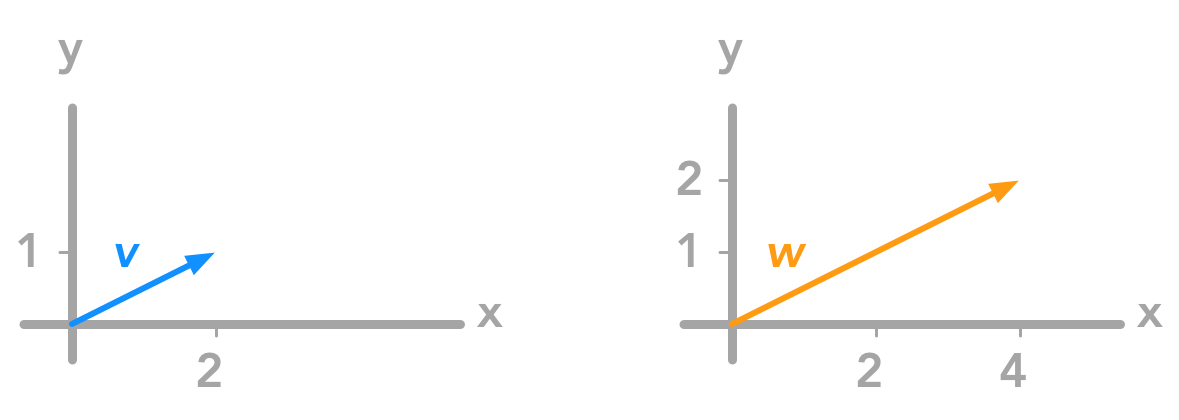

### 示例 2

上面是对单个向量作变换，我们也可以将矩阵应用于所有单位向量，以查看线性变换所产生的效果。

让我们将矩阵，

$$
\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix} 
$$

应用到单位圆上所有向量

$$
\begin{bmatrix} x’ \\ y’ \end{bmatrix}= \begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}= \begin{bmatrix} 2x \\ 2y \end{bmatrix} 
$$

如下图所示，我们可以看到这个矩阵作用到向量上的另一种效果可视化：单位圆上的每个向量的两个坐标都加倍了，蓝色圈圈被变换为黄色圈圈。

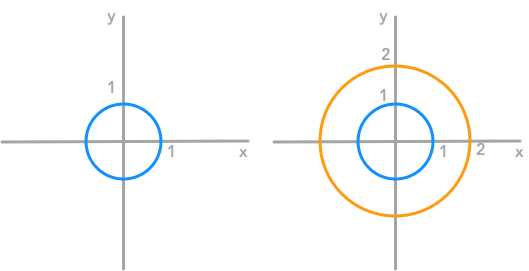

我们可以看到矩阵使圆的大小增加了一倍。但是在其他一些变换中，作用于 $x$ 坐标与 $y$ 坐标的缩放倍率不同。

### 示例 3

我们将下面矩阵，

$$
\begin{bmatrix} 3 & 0 \\ 0 & 2 \end{bmatrix} 
$$

作用到单位圆上的所有向量，

$$
\begin{bmatrix} x’ \\ y’ \end{bmatrix}= \begin{bmatrix} 3 & 0 \\ 0 & 2 \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}= \begin{bmatrix} 3x \\ 2y \end{bmatrix} 
$$

得到如下图所示效果，

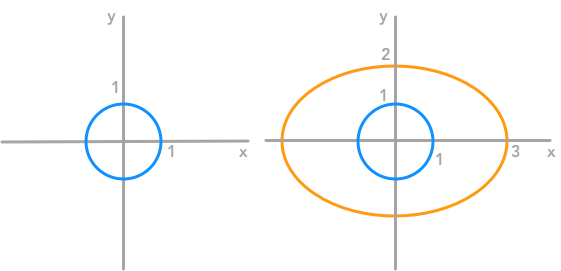

我们也可以用代码绘制一下这个变换。

In [3]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
import matplotlib

matplotlib.rc('xtick', labelsize=8)
matplotlib.rc('ytick', labelsize=8)

- 变换前

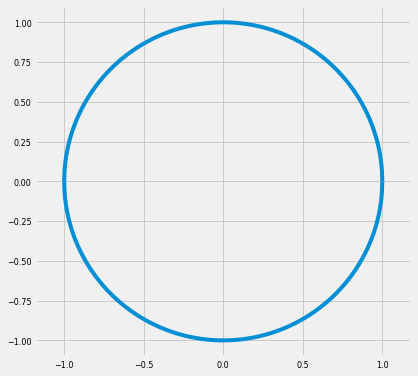

In [6]:
x = np.linspace(-1, 1, 1000)
y = np.sqrt(1-(x**2))

fig = plt.figure(figsize=(6, 6))
plt.plot(x, y, sns.color_palette().as_hex()[0])
plt.plot(x, -y, sns.color_palette().as_hex()[0])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.axis('equal');

- 变换后

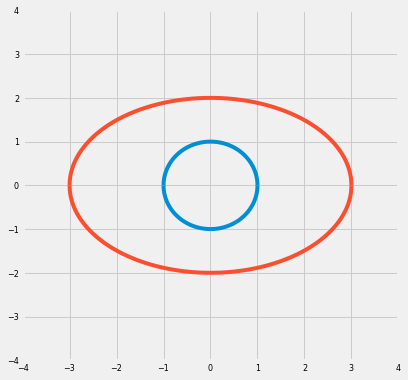

In [7]:
x1 = np.linspace(-3, 3, 1000)
y1 = 2*np.sqrt(1-((x1/3)**2))

fig = plt.figure(figsize=(6, 6))
plt.plot(x, y, sns.color_palette().as_hex()[0])
plt.plot(x, -y, sns.color_palette().as_hex()[0])
plt.plot(x1, y1, sns.color_palette().as_hex()[1])
plt.plot(x1, -y1, sns.color_palette().as_hex()[1])
plt.xlim(-4, 4)
plt.ylim(-4, 4);

## 二、奇异值分解

请注意，上面这些示例仅仅使用对角矩阵（除对角线以外的所有元素均为零）。

对角矩阵表示的变换仅意味着对每个坐标值的缩放而不考虑旋转、反射等变换，可以认为这是最简单的一种变换，但是可以作为理解 SVD 的第一步。

下面，我们考虑一般情况。先来看一下矩阵的奇异值分解，

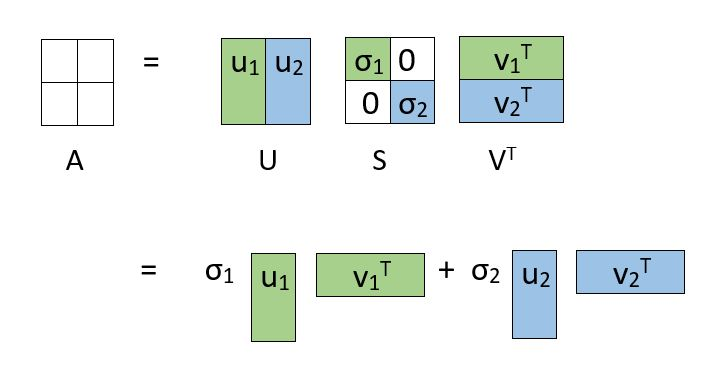

矩阵 $A$ 被分解成三个矩阵之积，其中 $U$ 和 $V$ 都正交矩阵，而 $S$ 是对角矩阵。正交矩阵表示旋转和反射等变换，但不改变向量的大小；而对角矩阵仅意味着对每个坐标作缩放。

概括一下：

- 使用 SVD 得到 $3$ 个矩阵 $U$、$S$ 和 $V$，它们的乘积就是原来的矩阵 $A$


- 将一个矩阵的变换作用分解成三个步骤，使得过程更加清晰


- 通过 SVD 可以得到矩阵 $A$ 的 $k-$秩近似表示。选择前 $k$ 个奇异值对应的 $3$ 个截断矩阵，即有

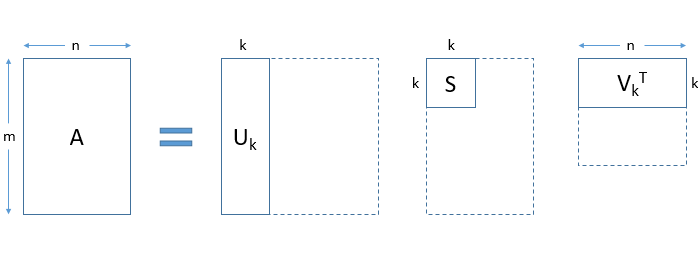 

下面，我们来考查不是对角矩阵时的情况，比如旋转。

### 示例 4：旋转矩阵

看如下的非对角矩阵，它是一个旋转矩阵。由于在谈论旋转时更容易考虑角度，因此我们将使用以下形式的矩阵

$$
R= \begin{bmatrix} cos(\theta) & -sin(\theta) \\ sin(\theta) & \;\; \! cos(\theta) \end{bmatrix} 
$$

这个矩阵将向量逆时针旋转角度 $\theta$，旋转后的新坐标为

$$
\begin{aligned} \begin{bmatrix} x’ \\ y’ \end{bmatrix} &= \begin{bmatrix} cos(\theta) & -sin(\theta) \\ sin(\theta) & cos(\theta) \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} \\[1em] &= \begin{bmatrix} xcos(\theta) - ysin(\theta) \\ xsin(\theta) + ycos(\theta) \end{bmatrix} \end{aligned} 
$$

令角度 $\theta = 45^\circ$，然后用这个矩阵去旋转向量。

让我们从坐标为 $x=0$ 和 $y=1$ 的向量 $\bf{u}$ 以及坐标为 $x=1$ 和 $y=0$ 的向量 $\bf{v}$ 开始。而向量 $\bf{u’}$ 和 $\bf{v’}$ 是旋转后得到的向量。

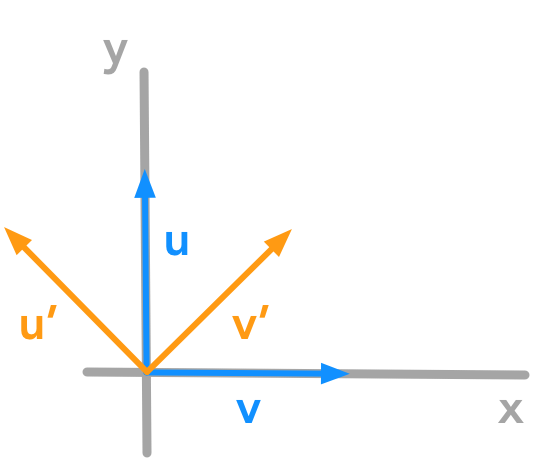

In [8]:
def plotVectors(vecs, cols, alpha=1):

    plt.figure(figsize=(6, 6))
    plt.axvline(x=0, color='#3A3A3A', lw=2, zorder=0)
    plt.axhline(y=0, color='#3A3A3A', lw=2, zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

绘制 $\bf{u}$ 和 $\bf{v}$：

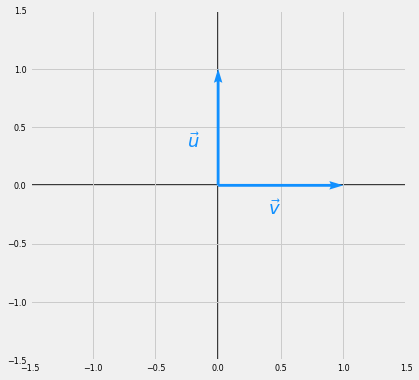

In [9]:
red, blue = '#FF3333', '#1190FF'

u,v = [1,0],[0,1]

plotVectors([u, v], cols=[blue, blue])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.text(-0.25, 0.32, r'$\vec{u}$', color=blue, size=18)
plt.text(0.4, -0.25, r'$\vec{v}$', color=blue, size=18);

这两个向量是直角坐标系的基向量。下面，我们来计算对这两个向量的变换，

$$
\begin{cases} u_x = 0\cdot cos(45) - 1\cdot sin(45)\\\\ u_y = 0\cdot sin(45) + 1\cdot cos(45) \end{cases} \Longleftrightarrow \begin{cases} u_x = -sin(45)\\\\ u_y = cos(45) \end{cases}
$$

$$
\begin{cases} v_x = 1\cdot cos(45) - 0\cdot sin(45)\\\\ v_y = 1\cdot sin(45) + 0\cdot cos(45) \end{cases} \Longleftrightarrow \begin{cases} v_x = cos(45)\\\\ v_y = sin(45) \end{cases}
$$

我们来绘制这些新得到的向量，以检查它们是否是原来的基向量被旋转了 $45^\circ$ 度。

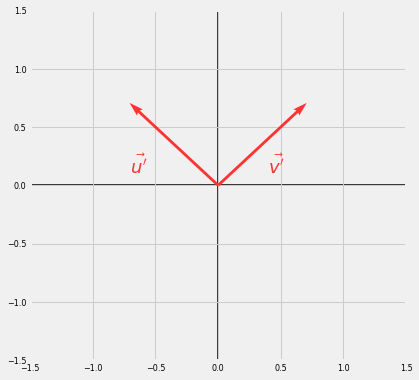

In [10]:
u1 = [-np.sin(np.radians(45)), np.cos(np.radians(45))]
v1 = [np.cos(np.radians(45)), np.sin(np.radians(45))]

plotVectors([u1, v1], cols=[red, red])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.text(-0.7, 0.1, r"$\vec{u'}$", color=red, size=18)
plt.text(0.4, 0.1, r"$\vec{v'}$", color=red, size=18);

- 将变换前后的向量画在一起

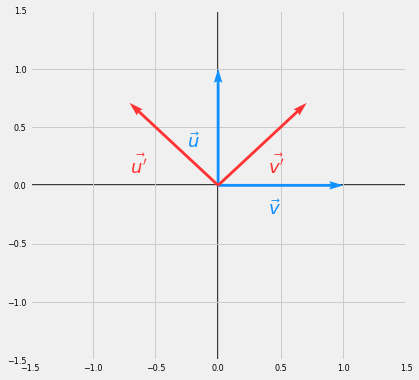

In [11]:
plotVectors([u, v, u1, v1], cols=[blue, blue,red, red])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

plt.text(-0.25, 0.32, r'$\vec{u}$', color=blue, size=18)
plt.text(0.4, -0.25, r'$\vec{v}$', color=blue, size=18)
plt.text(-0.7, 0.1, r"$\vec{u'}$", color=red, size=18)
plt.text(0.4, 0.1, r"$\vec{v'}$", color=red, size=18);

### 说明

numpy 函数 sin 和 cos 需要以弧度输入，可以使用函数 `np.radians()` 将角度从度数转换为弧度。

因为旋转没有改变向量的大小，所以变换一个圆的话，效果不明显。因此我们让它变换一个椭圆，以便能够看到旋转的效果。但实际上，矩阵变换的是整个平面，这里仅仅是借助具体的图形来将变换的效果可视化。

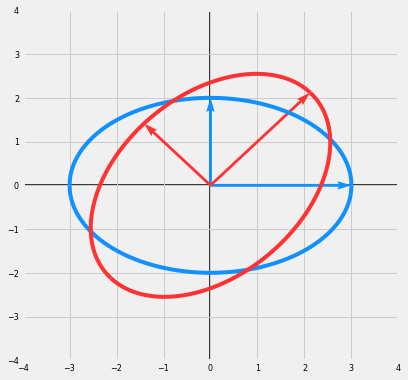

In [12]:
x = np.linspace(-3, 3, 1000)
y = 2*np.sqrt(1-((x/3)**2))

x1 = x*np.cos(np.radians(45)) - y*np.sin(np.radians(45))
y1 = x*np.sin(np.radians(45)) + y*np.cos(np.radians(45))

x1_neg = x*np.cos(np.radians(45)) - -y*np.sin(np.radians(45))
y1_neg = x*np.sin(np.radians(45)) + -y*np.cos(np.radians(45))

u, v = [3,0], [0,2]
u1 = [-2*np.sin(np.radians(45)), 2*np.cos(np.radians(45))]
v1 = [3*np.cos(np.radians(45)), 3*np.sin(np.radians(45))]

plotVectors([u, v, u1, v1], cols=[blue, blue, red, red])

plt.plot(x, y, blue)
plt.plot(x, -y, blue)

plt.plot(x1, y1, red)
plt.plot(x1_neg, y1_neg, red)

plt.xlim(-4, 4)
plt.ylim(-4, 4);

上图为旋转矩阵对椭圆的变换效果，可以看到，椭圆被旋转了 $45^\circ$。

### 小结

希望通过上面例子，可以了解到如何通过旋转或缩放矩阵来变换向量的。 SVD 可以看作是将一个复杂变换分解为 3 个更简单的变换：一个旋转、一个缩放和另一个旋转。

请注意，这里我们仅仅针对方阵。虽然 SVD 也可以针对非方阵，但不方便可视化非方阵的变换。例如，一个 $3 \times 2$ 的矩阵会将 2D 空间映射到 3D 空间。

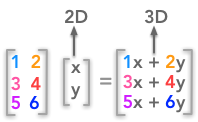

## 三、奇异值分解可视化

为了让矩阵和线性变换之间的关系更加清晰，我们借助 SVD 分解。

我们创建一个函数，该函数将一个 2D 矩阵作为输入，并将这个矩阵应用于变换单位圆。它的作用就是将矩阵代表的线性转换可视化。

In [15]:
def matrixToPlot(matrix, vectorsCol=['#FF3333', '#1190FF']):

    # 单位圆
    x = np.linspace(-1, 1, 1000)
    y = np.sqrt(1-(x**2))

    # 变换单位圆，将正负分开着色
    x1 = matrix[0,0]*x + matrix[0,1]*y
    y1 = matrix[1,0]*x + matrix[1,1]*y
    x1_neg = matrix[0,0]*x - matrix[0,1]*y
    y1_neg = matrix[1,0]*x - matrix[1,1]*y

    # 
    u1 = [matrix[0,0],matrix[1,0]]
    v1 = [matrix[0,1],matrix[1,1]]

    plotVectors([u1, v1], cols=[vectorsCol[0], vectorsCol[1]])

    plt.plot(x1, y1, 'purple', alpha=0.36)
    plt.plot(x1_neg, y1_neg, 'green', alpha=0.36)

我们用这个函数来检查 SVD 给出的三个变换是否等价于原始矩阵所做的变换。另外还将绘制 SVD 的每一步，以查看第一次旋转、缩放和第二次旋转各自的效果。

我们将使用如下矩阵，

$$
\bf{A}=\begin{bmatrix} 3 & 7 \\ 5 & 2 \end{bmatrix} 
$$

绘制单位圆及其在 $\bf{A}$ 变换下的结果。



单位圆:


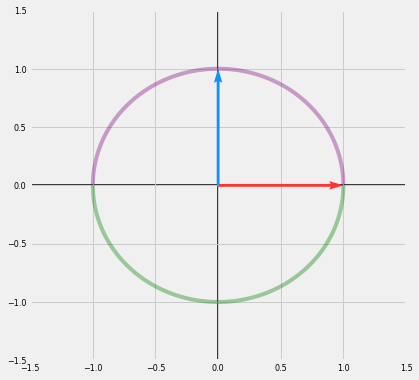



单位圆经 A 变换后的结果:


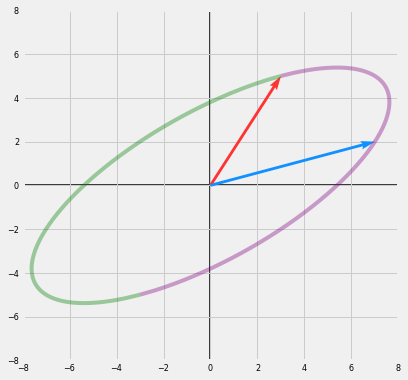

In [16]:
I = np.array([[1, 0], [0, 1]])
A = np.array([[3, 7], [5, 2]])

print('\n\n单位圆:')

matrixToPlot(I)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('\n\n单位圆经 A 变换后的结果:')
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8);

对上图的解读，

- 这就是我们将矩阵 $\bf{A}$ 应用于单位圆和基向量时得到的结果。


- 我们可以看到两个基向量不一定以相同的方向旋转，这与矩阵的行列式的符号有关。

现在让我们计算 $\bf{A}$ 的 SVD，以便将矩阵表示的线性变换逐步可视化出来。

In [17]:
# 对 A 作奇异值分解，得到三个矩阵，但注意中间的 S 只是对角元素
U, S, V = np.linalg.svd(A)
U

array([[-0.85065081, -0.52573111],
       [-0.52573111,  0.85065081]])

In [18]:
S

array([8.71337969, 3.32821489])

In [19]:
V

array([[-0.59455781, -0.80405286],
       [ 0.80405286, -0.59455781]])

- 我们把三个矩阵乘起来看看是否等于 $A$。

In [20]:
U @ np.diag(S) @ V.T

array([[ 5.81377674, -4.91934955],
       [ 0.4472136 , -5.36656315]])

In [21]:
U @ np.diag(S) @ V

array([[3., 7.],
       [5., 2.]])

> **请注意，函数 `np.linalg.svd(A)` 返回的是已经转置过的右奇异向量矩阵 V。**

我们现在可以通过以 $\bf{U}$、$\bf{S}$ 和 $\bf{V}$ 相反的顺序分别查看三个矩阵的效果。

In [22]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[96m'+'\033[1m'
    YELLOW = '\033[93m'
    RED = '\033[94m'+'\033[1m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'


单位圆:


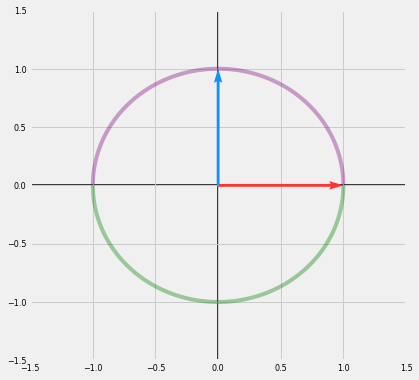

第一次正交变换 V:


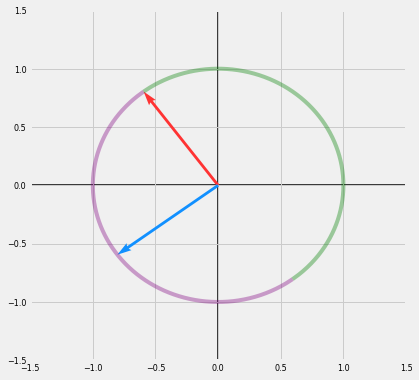

缩放:


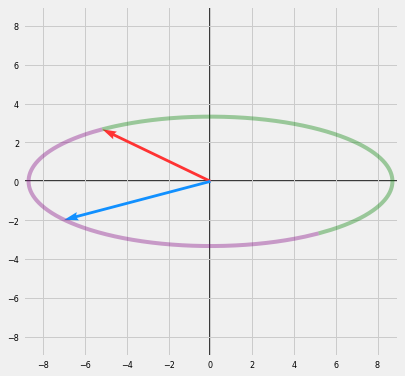

请对照两个奇异值： 8.7133796929634  和  3.3282148858288965 


第二次正交变换 U:


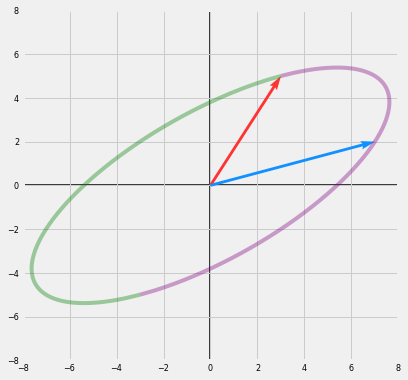

In [23]:
print(color.GREEN + '\n单位圆:' + color.END)
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print(color.GREEN + '第一次正交变换 V:' + color.END)
matrixToPlot(V)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print(color.GREEN + '缩放:' + color.END)
matrixToPlot(np.diag(S).dot(V))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()
print(color.GREEN + '请对照两个奇异值：', S[0], ' 和 ', S[1], color.END)

print(color.GREEN + '\n\n第二次正交变换 U:' + color.END)
matrixToPlot(U.dot(np.diag(S)).dot(V))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

### 对比

我们可以将最后一步与 $\bf{A}$ 直接变换的结果进行比较。结果是一样的，下图是矩阵 $\bf{A}$ 直接变换前后的效果。

|变换前|变换后|
|:-:|:-:|
|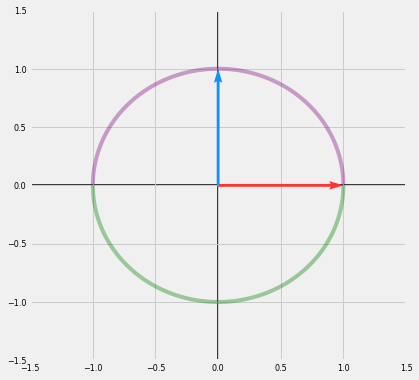|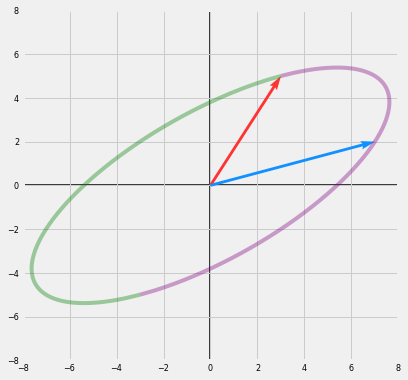|

- 通过奇异值分解一分为三，**从左上角顺时针走势**。

| | |
|:-:|:-:|
| 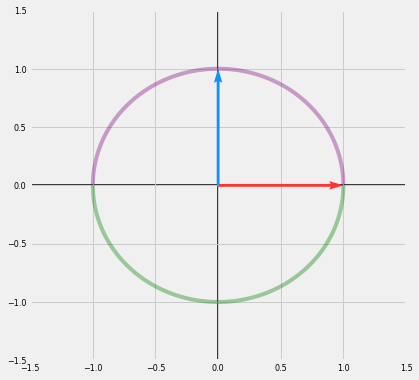 | 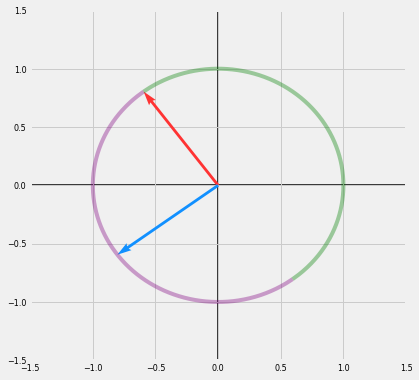 |
| 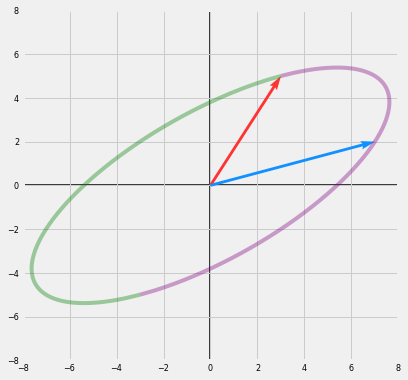 | 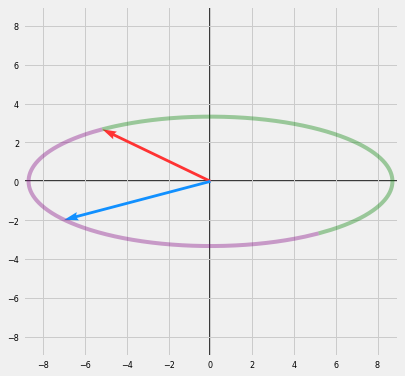|

## 四、奇异值的含义

$$
{\bf A}={\bf U \Sigma V}^{\top}=\left[\begin{array}{llll}{\bf u}_{1} & {\bf u}_{2} & \cdots & {\bf u}_{n}\end{array}\right]\left[\begin{array}{cccc}\sigma_{1} & & & \\& \sigma_{2} & & \\& & \ddots & \\& & & \sigma_{n}\end{array}\right]\left[\begin{array}{c}{\bf v}_{1}^{\top} \\{\bf v}_{2}^{\top} \\\vdots \\{\bf v}_{n}^{\top}\end{array}\right]
$$

注意，这里的对角矩阵 $S$ 中的奇异值按降序排列。下面我们来解释椭圆的主轴，它将第一个左奇异向量 ($u_1$) 和第一个奇异值 ($\sigma_1$) 联系起来。

In [24]:
def plotSVD(matrix, vectorsCol=['#FF3333', '#1190FF']):

    # Unit circle
    x = np.linspace(-1, 1, 1000)
    y = np.sqrt(1-(x**2))

    # Modified unit circle (separate negative and positive parts)
    x1 = matrix[0,0]*x + matrix[0,1]*y
    y1 = matrix[1,0]*x + matrix[1,1]*y
    x1_neg = matrix[0,0]*x - matrix[0,1]*y
    y1_neg = matrix[1,0]*x - matrix[1,1]*y

    # Vectors
    u1 = [matrix[0,0],matrix[1,0]]
    v1 = [matrix[0,1],matrix[1,1]]
    # 
    U, S, V = np.linalg.svd(matrix)
    u2 = [S[0]*U[0,0], S[0]*U[0,1]]
    v2 = [S[1]*U[1,0], S[1]*U[1,1]]
    
    V1 = [V[0,0], V[0,1]]
    V2 = [V[1,0], V[1,1]]
    
    plotVectors([u1, v1, u2, v2, V1, V2], cols=[vectorsCol[0], vectorsCol[1], 'black', 'black', 'green', 'green'])

    plt.plot(x1, y1, 'purple', alpha=0.36)
    plt.plot(x1_neg, y1_neg, 'green', alpha=0.36)
    
    plt.text(V[0,0]-0.5, V[0,1]-0.5, r"$v_1$", size=18)
    plt.text(V[1,0]+0.0, V[1,1]-0.5, r"$v_2$", size=18)
    plt.text(-5, -4, r"$\sigma_1u_1$", size=18)
    plt.text(-4, 1, r"$\sigma_2u_2$", size=18)
    
    plt.xlim(-8, 8)
    plt.ylim(-8, 8)

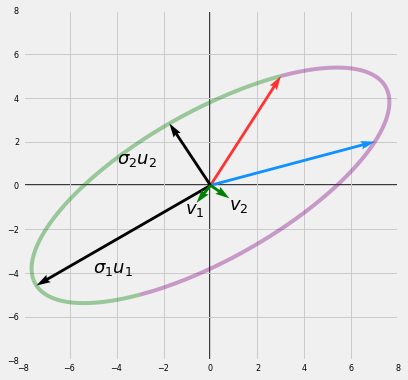

In [25]:
plotSVD(A)

由 ${\bf A}={\bf U \Sigma V}^{\top}$ 可得 ${\bf AV}={\bf U \Sigma}$，即

$$
A v_{i}=\sigma_{i} u_{i}
$$ 

奇异值和奇异向量相结合，得到椭圆的长轴 $\sigma_1u_1$ 和短轴 $\sigma_2u_2$。

最大的奇异值 $\sigma_1$ 其实对应矩阵的诱导范数，衡量了矩阵缩放向量的能力。

### 矩阵条件数

条件数可以用最大奇异值与最小奇异值的比值来表示，即

$$
\kappa({\bf A}) = \dfrac{\sigma_1}{\sigma_n}
$$

但是它并没有用到所有奇异值，而且比值没有上限。如果想把所有奇异值都考虑进来并且能有一个上限的话，我们可以考虑计算前面 $k$ 个较大的奇异值在所有的奇异值中的占比，即

$$
\dfrac{\sum_i^k \sigma_i}{\sum_i^n \sigma_i}
$$

此时，上式的最大值是 $1\;\!$。

## 五、SVD 和特征分解

现在我们已经知道了 SVD 对矩阵作分解也是对矩阵表示的线性变换进行分解，但这些分解出来的矩阵是怎么得到呢？

即矩阵 $\bf{U}$、$\bf{S}$ 和 $\bf{V}$ 是怎么通过 $\bf{A}$ 计算得来的呢？

- $\bf{U}$ 对应于 $\bf{AA}^{\top}$ 的特征向量；


- $\bf{V}$ 对应于 $\bf{A^{\top}A}$ 的特征向量；


- $\bf{S}$ 对应于 $\bf{AA}^{\top}$ 或 $\bf{A^{\top}A}$ 的相同的特征值。

我们来举一个非方阵的例子，

$$
\bf{A}=\begin{bmatrix} 7 & 2 \\ 3 & 4 \\ 5 & 3 \end{bmatrix} 
$$

奇异值分解可以使用 Numpy 中的 `linalg.svd()` 函数计算，但注意 `np.linalg.eig(A)` 仅适用于方阵，所以这里对 $A$ 调用它会出错。

In [ ]:
# 这样会出错：LinAlgError: Last 2 dimensions of the array must be square
np.linalg.eig(A)

### 通过对称矩阵求特征向量

- 求左奇异向量

$\bf{A}\bf{A}^{\top}$ 的特征向量：

In [120]:
np.linalg.eig(A.dot(A.T))[1]

array([[-0.69366543, -0.59343205, -0.40824829],
       [-0.4427092 ,  0.79833696, -0.40824829],
       [-0.56818732,  0.10245245,  0.81649658]])

- 求右奇异向量

$\bf{A}^{\top}\bf{A}$ 的特征向量：

In [122]:
np.linalg.eig(A.T.dot(A))[1]

array([[ 0.88033817, -0.47434662],
       [ 0.47434662,  0.88033817]])

### 对比直接调用 `np.linalg.svd` 的结果

In [ ]:
A = np.array([[7, 2], [3, 4], [5, 3]])

U, S, V = np.linalg.svd(A)

In [118]:
U

array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]])

In [121]:
V

array([[-0.88033817, -0.47434662],
       [ 0.47434662, -0.88033817]])

### 特征值

In [138]:
np.linalg.eig(A.T.dot(A))[0]

array([11.07701433, 75.92298567])

In [139]:
np.linalg.eig(A.dot(A.T))[0]

array([75.92298567, 11.07701433])